In [12]:
def conv_traj(fin, fout=None, **kwargs):
    """patched ase io for this notebook"""
    from mock import patch
    all_properties = [f'{prop}{suffix}'  for prop in ['energy', 'forces', 'stress']  for suffix in ['', '_avg','_std','_bias']]
    per_atom_properties = [f'{prop}{suffix}'  for prop in ['forces']  for suffix in ['', '_avg','_std','_bias']]
    per_config_properties = [f'{prop}{suffix}'  for prop in ['energy', 'stress']  for suffix in ['', '_avg','_std','_bias']]
    with patch('ase.calculators.calculator.all_properties', all_properties), \
         patch('ase.io.extxyz.per_atom_properties', per_atom_properties), \
         patch('ase.io.extxyz.per_config_properties', per_config_properties):
        from ase.io import read, write
        from ase.io.trajectory import read_traj
        traj = read(fin, **kwargs)
        for atoms in traj:
            for k,v in atoms.calc.results.items():
                if 'energy' in k:
                    atoms.calc.results[k] = float(v)
        if fout is not None:
            write(fout, traj)
        else:
            return traj
        
#--------------------------------------#
#  uncomment below for testing purpose # 
#--------------------------------------#
traj = conv_traj('/cephyr/users/yunqi/Alvis/asemd.traj', index=':')
# list(traj[0].calc.results.keys())
# conv_traj('asemd.traj', 'tmp.xyz', index='::10')

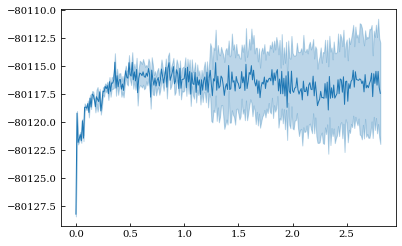

In [13]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
e_bias = np.array([a.calc.results['energy_bias'] for a in traj])
e_avg = np.array([a.calc.results['energy_avg'] for a in traj])
e_std = np.array([a.calc.results['energy_std'] for a in traj])
e = np.array([a.calc.results['energy'] for a in traj])
e_base = np.mean(e_avg)
t = np.arange(len(e_std))/100.
plt.fill_between(t, e_avg-e_std*2, e_avg+e_std*2, color='tab:blue', alpha=0.3)
plt.plot(t, e_avg, color='tab:blue', lw=1)
# plt.plot(t, e_avg+e_bias, color='tab:green')

In [ ]:
# some normal conversion for visualization

from ase.io import read, write
traj = read('../trajs/ase/nvt-300k-100ps/pils-v5-filtered-pinet-adam-v2-pre-hoac-c1im-a32b32i0-rho1.0753/asemd.traj', index='::10')
write('adam-m32-r1.0-100ps.xyz', traj)
traj = read('../trajs//ase/nvt-300k-100ps/pils-v5-filtered-pinet-ekf-v3-pre-hoac-c1im-a32b32i0-rho1.0753/asemd.traj', index='::10')
write('ekf-m32-r1.0-100ps.xyz', traj)